In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

import warnings
warnings.filterwarnings("ignore")

In [2]:
absent = pd.read_excel('C:/Users/AJ/Documents/Workspace/Projects/Main Proj/Absenteism/Absenteeism_at_work.xls')
absent.rename(columns={'Son':'No. of Children'}, inplace=True)
absent

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,No. of Children,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [4]:
absent.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.0,9.0,18.0,28.0,36.0
Reason for absence,740.0,19.216216,8.433406,0.0,13.0,23.0,26.0,28.0
Month of absence,740.0,6.324324,3.436287,0.0,3.0,6.0,9.0,12.0
Day of the week,740.0,3.914865,1.421675,2.0,3.0,4.0,5.0,6.0
Seasons,740.0,2.544595,1.111831,1.0,2.0,3.0,4.0,4.0
Transportation expense,740.0,221.329730,66.952223,118.0,179.0,225.0,260.0,388.0
Distance from Residence to Work,740.0,29.631081,14.836788,5.0,16.0,26.0,50.0,52.0
Service time,740.0,12.554054,4.384873,1.0,9.0,13.0,16.0,29.0
Age,740.0,36.450000,6.478772,27.0,31.0,37.0,40.0,58.0
Work load Average/day,740.0,271490.235135,39058.116188,205917.0,244387.0,264249.0,294217.0,378884.0


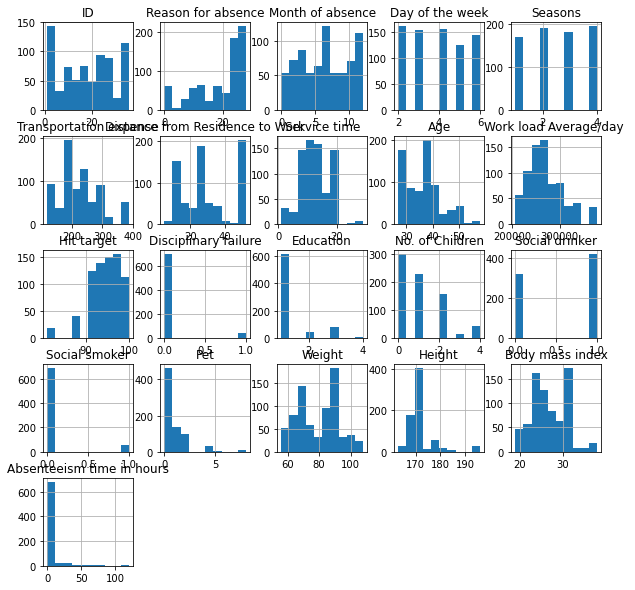

In [6]:
absent.hist()
plt.gcf().set_size_inches(10,10)

In [21]:
# Tuning for the best possible number of features to select

sAbsent = absent.values
a = sAbsent[:, :-1]
b = sAbsent[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    for i in range(2, 21):
        model = LogisticRegression()
        rfe = RFE(model, n_features_to_select=i)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, a, b):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, a, b, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, a, b)
    results.append(scores)
    names.append(name)
    print('for %s features, Mean Absolute Error is: %.1f, Std is: %.3f' % (name, mean(scores) * 100, std(scores)))

for 2 features, Mean Absolute Error is: -481.4, Std is: 1.322
for 3 features, Mean Absolute Error is: -493.9, Std is: 1.316
for 4 features, Mean Absolute Error is: -488.2, Std is: 1.352
for 5 features, Mean Absolute Error is: -477.4, Std is: 1.372
for 6 features, Mean Absolute Error is: -471.5, Std is: 1.322
for 7 features, Mean Absolute Error is: -454.2, Std is: 1.378
for 8 features, Mean Absolute Error is: -456.5, Std is: 1.356
for 9 features, Mean Absolute Error is: -433.9, Std is: 1.352
for 10 features, Mean Absolute Error is: -437.2, Std is: 1.381
for 11 features, Mean Absolute Error is: -435.3, Std is: 1.369
for 12 features, Mean Absolute Error is: -436.9, Std is: 1.371
for 13 features, Mean Absolute Error is: -433.3, Std is: 1.369
for 14 features, Mean Absolute Error is: -442.6, Std is: 1.425
for 15 features, Mean Absolute Error is: -454.2, Std is: 1.522
for 16 features, Mean Absolute Error is: -488.8, Std is: 1.490
for 17 features, Mean Absolute Error is: -526.5, Std is: 1.655


In [22]:
# Identfying the algorithm that would select feature better

fAbsent = absent.values
c = fAbsent[:, :-1]
d = fAbsent[:, -1]

# get a list of models to evaluate
def getModels():
    models = dict()
    
    # linear regression
    model = LogisticRegression()
    rfe = RFE(model, n_features_to_select=13) 
    models['Logistic regression'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # perceptron
    model = Perceptron()
    rfe = RFE(model, n_features_to_select=13)
    models['Perceptron'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # decision tree
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select=13) 
    models['Decision tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # random forest
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select=13)
    models['Random forest'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gradient boosting 
    model = GradientBoostingClassifier()
    rfe = RFE(model, n_features_to_select=13) 
    models['Gradient boosting'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluateModel(model, c, d):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, c, d, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = getModels()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluateModel(model, c, d)
    results.append(scores)
    names.append(name)
    print('%s algorithm has %.3f Mean and a Std of %.3f' % (name, mean(scores)*100, std(scores)))


Logistic regression algorithm has -441.216 Mean and a Std of 0.506
Perceptron algorithm has -1723.604 Mean and a Std of 27.779
Decision tree algorithm has -645.090 Mean and a Std of 1.665
Random forest algorithm has -477.342 Mean and a Std of 1.038
Gradient boosting algorithm has -635.901 Mean and a Std of 1.629


In [23]:
sAbsent9= absent.values
e = sAbsent9[:, 0:-1]
f = sAbsent9[:, -1]

# feature extraction
model = LogisticRegression()

rfe = RFE(model, n_features_to_select=13)
pipeline = Pipeline(steps=[('s',rfe), ('m',model)])
fit = rfe.fit(e, f)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
nScores = cross_val_score(pipeline, e, f, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('Mean Absolute Error: %.3f '  %  (mean(nScores)))
print()
print('Standard Deviation Accuracy: %.3f' % std(nScores))
print()
print('Selected Features: {}'.format(fit.n_features_))

Mean Absolute Error: -4.412 

Standard Deviation Accuracy: 0.506

Selected Features: 13


In [26]:
# identifying the features that were selected

features = rfe.transform(e)

iAbsent = pd.DataFrame(features)
iAbsent.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']

# to make it look organised when returning 
absentCol = dict()
cols = list(absent.columns)[0:-1] # the list of columns in your data
for col in cols:
    absentCol[col]= absent[col].values.tolist()
    
collen = len(iAbsent.columns.tolist())
counter = 0
while counter < collen:
    colLabel = ''
    if counter == 0:
        colLabel = 'a'
    elif counter == 1:
        colLabel = 'b'
    elif counter == 2:
        colLabel = 'c'
    elif counter == 3:
        colLabel = 'd'  
    elif counter == 4:
        colLabel = 'e'
    elif counter == 5:
        colLabel = 'f'
    elif counter == 6:
        colLabel = 'g'
    elif counter == 7:
        colLabel = 'h'
    elif counter == 8:
        colLabel = 'i'
    elif counter == 9:
        colLabel = 'j'
    elif counter == 10:
        colLabel = 'k'
    elif counter == 11:
        colLabel = 'l'
    elif counter == 12:
        colLabel = 'm'
    else:
        pass
    colData = iAbsent.loc[:,colLabel]
    colDataVals = list(colData.values)
    for item in absentCol.items():
        if colDataVals == item[1]:
            print('Label is: ', item[0])
    counter+=1
print()
# end of organisation

print('The selected features are: ')
iAbsent.head(10)

Label is:  ID
Label is:  Reason for absence
Label is:  Month of absence
Label is:  Seasons
Label is:  Transportation expense
Label is:  Distance from Residence to Work
Label is:  Service time
Label is:  Age
Label is:  Hit target
Label is:  No. of Children
Label is:  Weight
Label is:  Height
Label is:  Body mass index

The selected features are: 


,a,b,c,d,e,f,g,h,i,j,k,l,m
0,11,26,7,1,289,36,13,33,97,2,90,172,30
1,36,0,7,1,118,13,18,50,97,1,98,178,31
2,3,23,7,1,179,51,18,38,97,0,89,170,31
3,7,7,7,1,279,5,14,39,97,2,68,168,24
4,11,23,7,1,289,36,13,33,97,2,90,172,30
5,3,23,7,1,179,51,18,38,97,0,89,170,31
6,10,22,7,1,361,52,3,28,97,1,80,172,27
7,20,23,7,1,260,50,11,36,97,4,65,168,23
8,14,19,7,1,155,12,14,34,97,2,95,196,25
9,1,22,7,1,235,11,14,37,97,1,88,172,29


In [29]:
sAbsent = absent.loc[:, ['ID','Reason for absence', 'Month of absence', 'Seasons',
                         'Transportation expense', 'Distance from Residence to Work',
                         'Service time', 'Age', 'Hit target', 'No. of Children',
                         'Weight', 'Social drinker', 'Body mass index']]
sAbsent['Absenteeism time in hours'] = absent['Absenteeism time in hours']
sAbsent

,ID,Reason for absence,Month of absence,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,No. of Children,Weight,Social drinker,Body mass index,Absenteeism time in hours
0,11,26,7,1,289,36,13,33,97,2,90,1,30,4
1,36,0,7,1,118,13,18,50,97,1,98,1,31,0
2,3,23,7,1,179,51,18,38,97,0,89,1,31,2
3,7,7,7,1,279,5,14,39,97,2,68,1,24,4
4,11,23,7,1,289,36,13,33,97,2,90,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,1,289,36,13,33,93,2,90,1,30,8
736,1,11,7,1,235,11,14,37,93,1,88,0,29,4
737,4,0,0,1,118,14,13,40,95,1,98,1,34,0
738,8,0,0,2,231,35,14,39,95,2,100,1,35,0


In [30]:
sAbsent.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.0,9.0,18.0,28.0,36.0
Reason for absence,740.0,19.216216,8.433406,0.0,13.0,23.0,26.0,28.0
Month of absence,740.0,6.324324,3.436287,0.0,3.0,6.0,9.0,12.0
Seasons,740.0,2.544595,1.111831,1.0,2.0,3.0,4.0,4.0
Transportation expense,740.0,221.329730,66.952223,118.0,179.0,225.0,260.0,388.0
Distance from Residence to Work,740.0,29.631081,14.836788,5.0,16.0,26.0,50.0,52.0
Service time,740.0,12.554054,4.384873,1.0,9.0,13.0,16.0,29.0
Age,740.0,36.450000,6.478772,27.0,31.0,37.0,40.0,58.0
Hit target,740.0,94.587838,3.779313,81.0,93.0,95.0,97.0,100.0
No. of Children,740.0,1.018919,1.098489,0.0,0.0,1.0,2.0,4.0


# Data Transformation

In [34]:
# rescaling the data
rescale = sAbsent.values
g= rescale[:, 0:-1]
h= rescale[:, -1]

scaler = MinMaxScaler(feature_range=(0,1))
rh = scaler.fit_transform(g)
set_printoptions(precision=3)

# put transorm data into dataframe and display
rAbsent = pd.DataFrame(rh)
rAbsent.columns = ['ID', 'Reason for absence', 'Month of absence', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Hit target', 'No. of Children', 'Weight',
       'Social drinker', 'Body mass index']

# adding back the 'target' output feature
rAbsent['Absenteeism time in hours'] = sAbsent['Absenteeism time in hours']
rAbsent.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,0.486216,0.314893,0.0,0.228571,0.485714,0.771429,1.0
Reason for absence,740.0,0.686293,0.301193,0.0,0.464286,0.821429,0.928571,1.0
Month of absence,740.0,0.527027,0.286357,0.0,0.250000,0.500000,0.750000,1.0
Seasons,740.0,0.514865,0.370610,0.0,0.333333,0.666667,1.000000,1.0
Transportation expense,740.0,0.382703,0.247971,0.0,0.225926,0.396296,0.525926,1.0
Distance from Residence to Work,740.0,0.524066,0.315676,0.0,0.234043,0.446809,0.957447,1.0
Service time,740.0,0.412645,0.156603,0.0,0.285714,0.428571,0.535714,1.0
Age,740.0,0.304839,0.208993,0.0,0.129032,0.322581,0.419355,1.0
Hit target,740.0,0.715149,0.198911,0.0,0.631579,0.736842,0.842105,1.0
No. of Children,740.0,0.254730,0.274622,0.0,0.000000,0.250000,0.500000,1.0


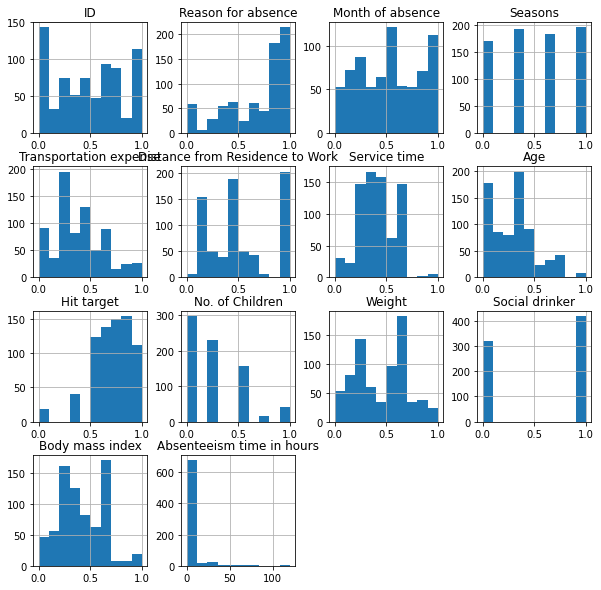

In [39]:
rAbsent.hist()
plt.gcf().set_size_inches(10,10)

In [35]:
# Normalizing the data

norm = sAbsent.values
i = norm[:, 0:-1]
j = norm[:, -1]

nScaler = Normalizer()
nc = nScaler.fit_transform(i)
set_printoptions(precision=3)

# put transorm data into dataframe and display
nAbsent = pd.DataFrame(nc)
nAbsent.columns = ['ID', 'Reason for absence', 'Month of absence', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Hit target', 'No. of Children', 'Weight',
       'Social drinker', 'Body mass index']

# adding back the 'target' output feature
nAbsent['Absenteeism time in hours'] = sAbsent['Absenteeism time in hours']
nAbsent.describe()

,ID,Reason for absence,Month of absence,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,No. of Children,Weight,Social drinker,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.073555,0.076232,0.024552,0.009994,0.819671,0.112776,0.050252,0.144303,0.372488,0.003671,0.312434,0.002152,0.105146,6.924324
std,0.054471,0.037563,0.014311,0.004799,0.091175,0.056693,0.021237,0.041844,0.076647,0.003890,0.088050,0.001963,0.027822,13.330998
min,0.003632,0.000000,0.000000,0.002564,0.594016,0.016275,0.003697,0.071958,0.223552,0.000000,0.161493,0.000000,0.052175,0.000000
25%,0.025817,0.050242,0.012432,0.006185,0.761737,0.066339,0.037274,0.110565,0.315040,0.000000,0.241130,0.000000,0.082369,2.000000
50%,0.067781,0.081332,0.023213,0.009330,0.855499,0.099767,0.046068,0.140251,0.364109,0.003553,0.278880,0.003081,0.093059,3.000000
75%,0.107119,0.103486,0.034322,0.013695,0.885164,0.134244,0.066212,0.162190,0.422417,0.006183,0.378631,0.004222,0.131760,8.000000
max,0.189383,0.154706,0.065314,0.022280,0.948170,0.223508,0.132797,0.262714,0.539287,0.013792,0.518722,0.005533,0.179965,120.000000


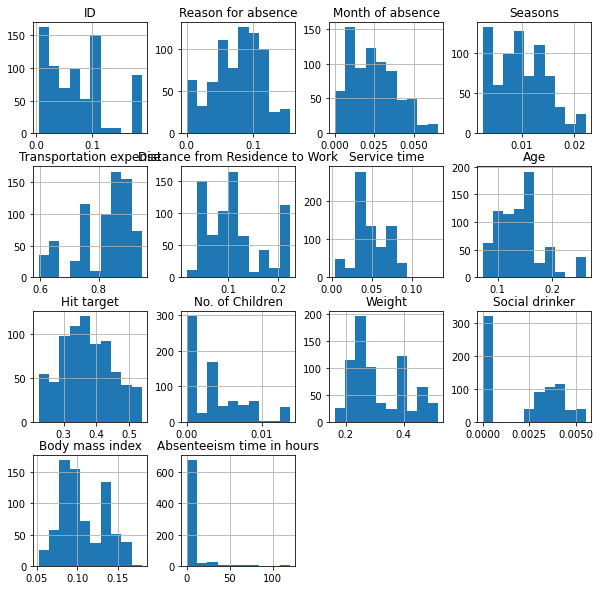

In [38]:
nAbsent.hist()
plt.gcf().set_size_inches(10,10)

In [42]:
# testing for accuracy of the selected features with LogisticRegression

tAbsent = nAbsent.values
x = tAbsent[:, 0:-1]
y = tAbsent[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

model = LogisticRegression()
model.fit(x_train, y_train) 

# evaluate the model
yhat = model.predict(x_test)

accuracy = mean_absolute_error(y_test, yhat)
print('The mean absolute error of the selected features for modeling is: %.2f' % (accuracy*100))

The mean absolute error of the selected features for modeling is: 565.71
